## Basic Stock Analysis 
#### Bryant Crocker 

In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
%matplotlib inline

In order to pull in daily stock prices I will use the ffn library. The ffn library pulls in data from yahoo finance.  I will start on the first of Janauary 2010.  A few years after the 2008 recession.


I am looking at:

* Under Armour - UAA

* Nike - NKE 

* Adidas - ADS

* Vans Footwear Company - VFC


In [115]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa', start='2010-01-01')
#Use the pd.head() method to get an idea of what the data looks like
prices.head()

nke        ads        vfc      uaa
Date                                                
2010-01-04  12.217500  64.814217  11.234499  3.51000
2010-01-05  12.266110  64.942101  11.448840  3.61500
2010-01-06  12.191328  65.266708  11.402914  3.69500
2010-01-07  12.310980  65.866745  11.623373  3.65125
2010-01-08  12.286675  66.575005  11.562134  3.64375

A simple plot of historical prices.  Their seems to be a fair deal of variabilty around the price of Adidas. 

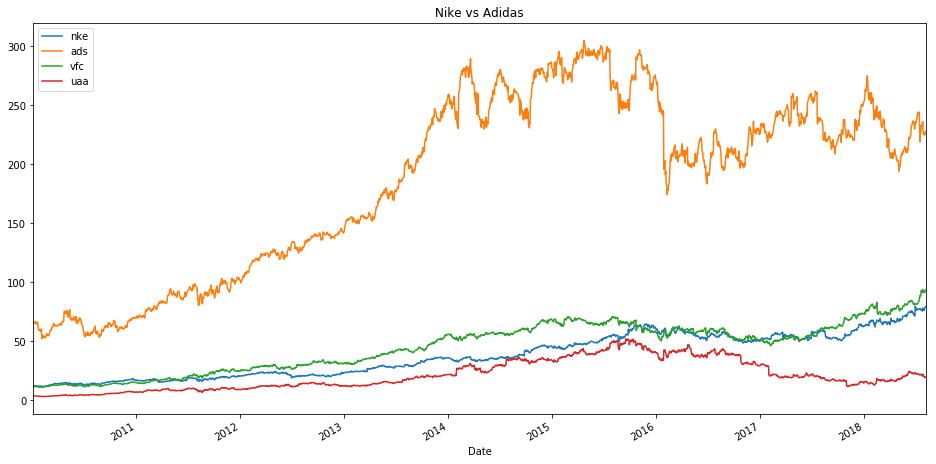

In [197]:
#plot a simply line plot to show the prices of the two assets over time.
prices[['nke', 'ads','vfc','uaa']].plot(figsize=(16,8))

plt.title("Nike vs Adidas")
plt.show()

Under armour has the highest returns on average.  Note that the x-axis of the histograms are not on the same scale.

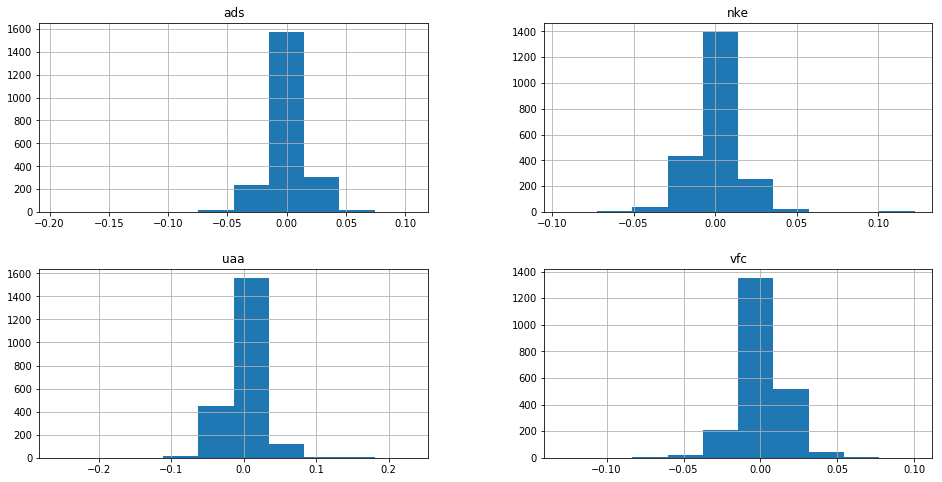

In [198]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(16,8))

nke    0.000977
ads    0.000729
vfc    0.001096
uaa    0.001135
dtype: float64

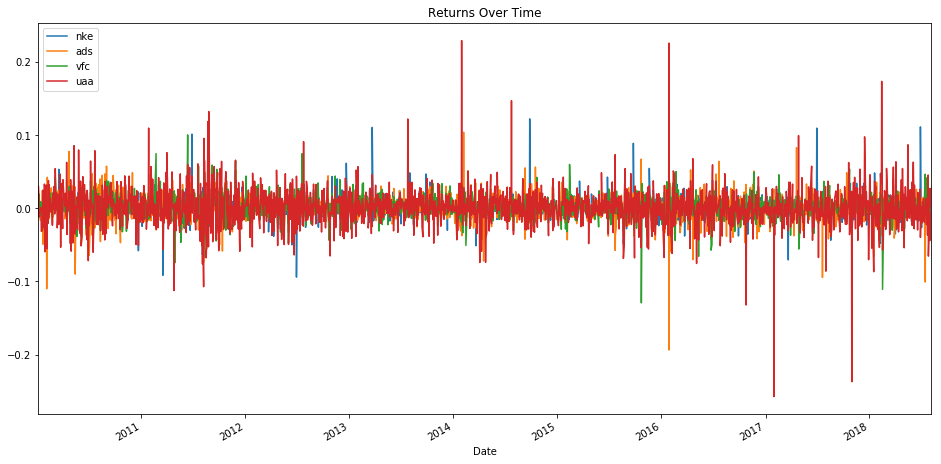

In [200]:
returns.plot(figsize=(16,8))
plt.title("Returns Over Time")
returns.mean()

#  Forecasts:

To forcast future closing values of the selected securities, I will use the Facebook's *prophet* forecasting api.  Prophet fits a general additive model using time series data.   

## Under Armor 

In [203]:
UnderArmor = prices['uaa']

In [204]:
UnderArmor = pd.DataFrame(UnderArmor).reset_index().rename(columns={"Date": "ds", "uaa": "y"})

In [205]:
from fbprophet import Prophet

m = Prophet()
m.fit(UnderArmor)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
2523 2019-08-02  6.155571    0.447186   11.531670
2524 2019-08-03  6.195476    0.688317   11.318632
2525 2019-08-04  6.143902    0.527467   11.614589
2526 2019-08-05  5.968313    0.632888   11.598432
2527 2019-08-06  5.834793    0.441772   11.011382

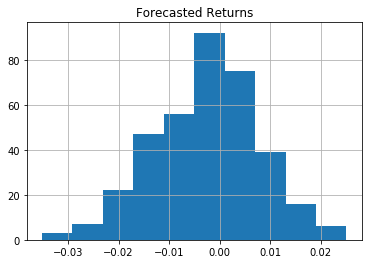

In [206]:
today = pd.to_datetime('today')
UnderArmorf = forecast[forecast.ds > today]
UnderArmorf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

KeyError: 'ds'

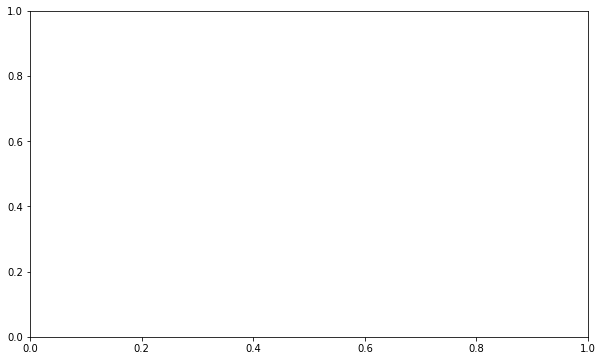

In [202]:
plt.figure(figsize=(16,8))
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Under Armor Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("UnderArmor.png")
plt.show()

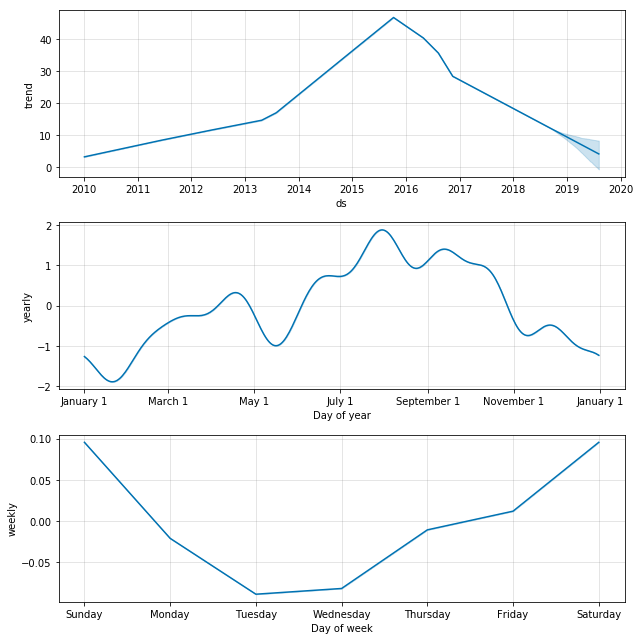

In [124]:
# Python
fig2 = m.plot_components(forecast)

In [125]:
iplot([
    go.Scatter(x=UnderArmor['ds'], y=UnderArmor['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Nike Forecast 

In [126]:
Nike = prices['nke']
Nike = pd.DataFrame(Nike).reset_index().rename(columns={"Date": "ds", "nke": "y"})
m = Prophet()
m.fit(Nike)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
2523 2019-08-02  84.871877   77.366258   92.877525
2524 2019-08-03  84.776167   77.643561   92.688758
2525 2019-08-04  84.738824   77.593401   92.971131
2526 2019-08-05  84.736668   77.899822   92.994399
2527 2019-08-06  84.631310   77.745755   92.239286

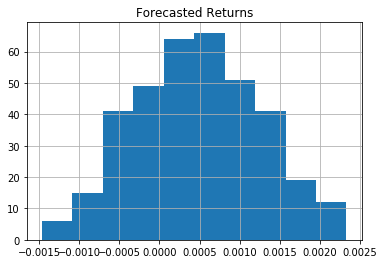

In [127]:
today = pd.to_datetime('today')
Nikef = forecast[forecast.ds > today]
Nikef['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

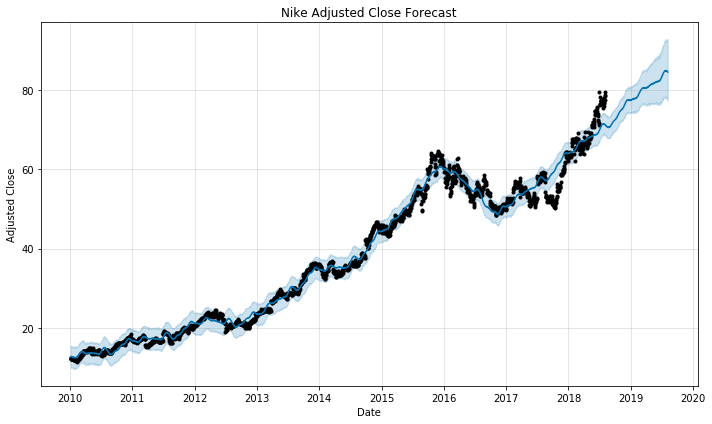

In [128]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Nike Adjusted Close Forecast")
plt.savefig('nike.png')
plt.tight_layout()
plt.show()

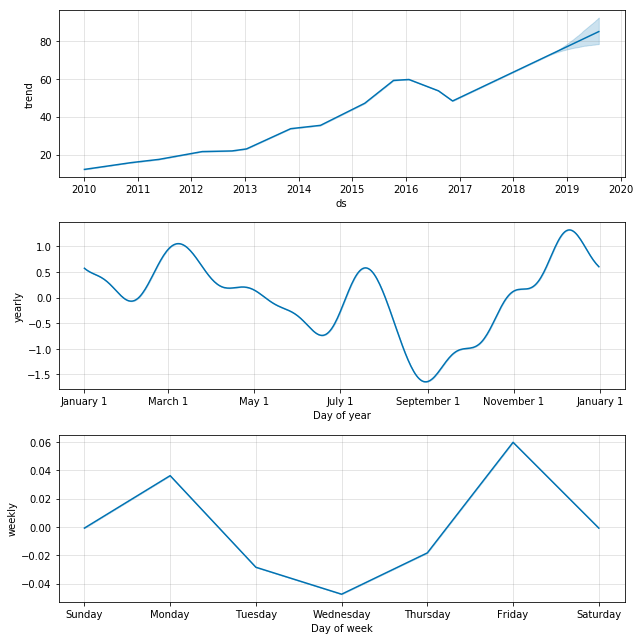

In [129]:
# Python
fig2 = m.plot_components(forecast)

In [130]:
iplot([
    go.Scatter(x=Nike['ds'], y=Nike['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

# Adidas Forecast

In [188]:
Adidas = prices['ads']
Adidas = pd.DataFrame(Adidas).reset_index().rename(columns={"Date": "ds", "ads": "y"})
Adidas['y'] = np.log(Adidas['y'])
m = Prophet()
m.fit(Adidas)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
2523 2019-08-02  5.410234    5.050837    5.748720
2524 2019-08-03  5.466901    5.126965    5.826758
2525 2019-08-04  5.464465    5.097894    5.808230
2526 2019-08-05  5.402877    5.035967    5.759851
2527 2019-08-06  5.399786    5.039728    5.754960

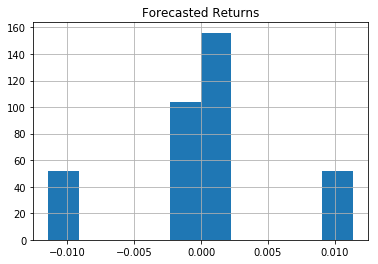

In [189]:
today = pd.to_datetime('today')
Adidasf = forecast[forecast.ds > today]
Adidasf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

In [190]:
forecast.set_index('ds', inplace = True)
forecast2 = np.expm1(forecast[['yhat', 'yhat_lower', 'yhat_upper']])
forecast2.reset_index(inplace = True)
forecast2.head()

ds       yhat  yhat_lower  yhat_upper
0 2010-01-04  59.473388   55.513745   63.562290
1 2010-01-05  59.587468   55.663269   63.744461
2 2010-01-06  59.801479   56.116872   63.952332
3 2010-01-07  59.929108   55.989740   64.175122
4 2010-01-08  59.987852   55.892130   64.261568

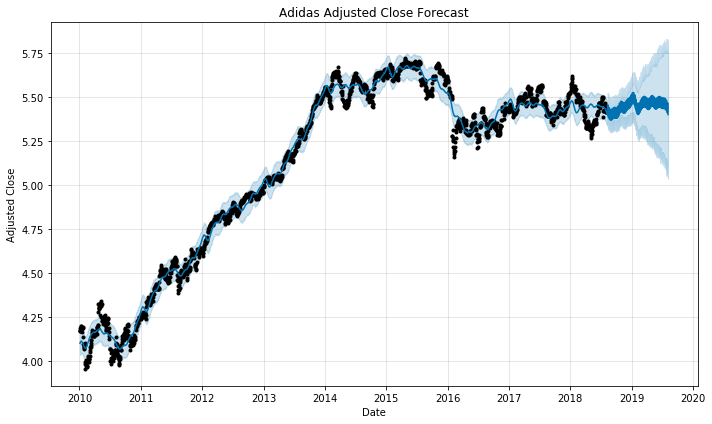

In [191]:
fig1 = m.plot(forecast.reset_index())
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Adidas Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("Adidas.png")
plt.show()

In [192]:
Adidas['y'] = np.expm1(Adidas['y'])
iplot([
    go.Scatter(x=Adidas['ds'], y=Adidas['y'], name='Adjusted Closing Price'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat'], name='Estimate'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_upper'], fill='tonexty', mode='none', name='Upper CI'),
    go.Scatter(x=forecast2['ds'], y=forecast2['yhat_lower'], fill='tonexty', mode='none', name='Lower CI')
    #go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

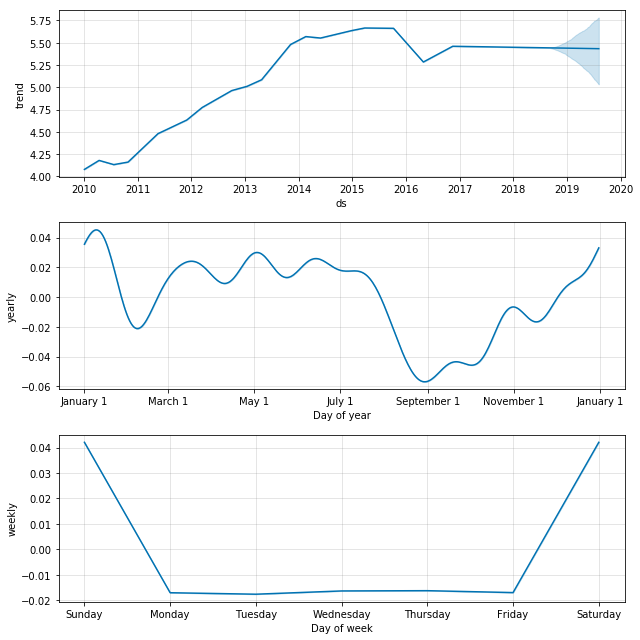

In [177]:
# Python
fig2 = m.plot_components(forecast.reset_index())

# Vans Footwear Forecast

In [28]:
Vans = prices['vfc']
Vans = pd.DataFrame(Vans).reset_index().rename(columns={"Date": "ds", "vfc": "y"})
m = Prophet()
m.fit(Vans)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds        yhat  yhat_lower  yhat_upper
2523 2019-08-02  109.297509   94.994311  124.086041
2524 2019-08-03  108.676184   94.091326  123.261606
2525 2019-08-04  108.698102   94.285616  123.909467
2526 2019-08-05  109.350908   94.944928  124.225229
2527 2019-08-06  109.351641   94.668662  124.837735

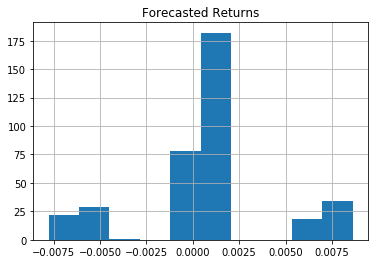

In [29]:
today = pd.to_datetime('today')
vansf = forecast[forecast.ds > today]
vansf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

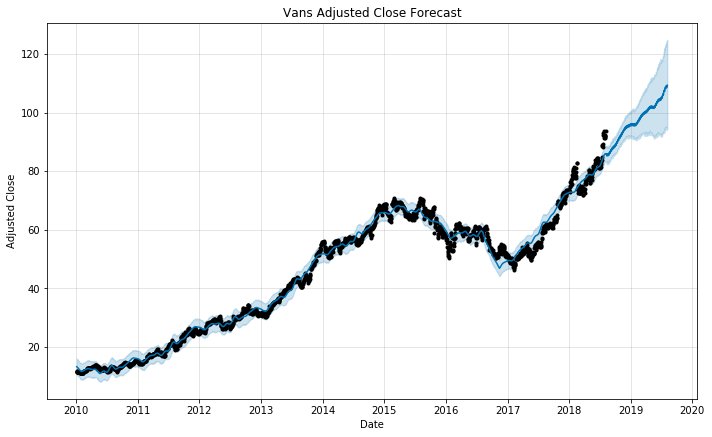

In [30]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Vans Adjusted Close Forecast")
plt.savefig("vans.png")
plt.show()

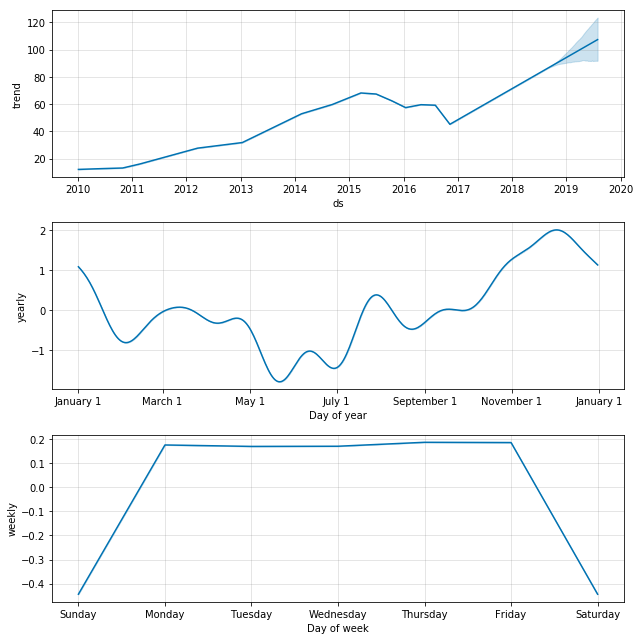

In [46]:
# Python
fig2 = m.plot_components(forecast)

In [35]:
iplot([
    go.Scatter(x=Vans['ds'], y=Vans['y'], name='y'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='yhat'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='none', name='upper'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill='tonexty', mode='none', name='lower'),
    go.Scatter(x=forecast['ds'], y=forecast['trend'], name='Trend')
])

In [34]:
Vans.head()

ds          y
0 2010-01-04  11.234499
1 2010-01-05  11.448840
2 2010-01-06  11.402914
3 2010-01-07  11.623373
4 2010-01-08  11.562134